### Benchmark SeismicPro methods

| Function Name| Optimal target | Link |
| :---:        | :----: |  :---:|
|*__BATCH__*|||
| \_load_gather | for |[_load_gather](#load_gather)|
| \_load_combined_gather | for |  [_load_combined_gather](#load_combined_gather)|
|*__GATHER__*|||
| copy | threads | [copy](#copy) |
| get_item | for | [get_item](#get_item) |
| dump | for | [dump](#dump) |
| sort | for | [sort](#sort) |
| pick_to_mask | threads | [pick_to_mask](#pick_to_mask) |
| mask_to_pick | for | [mask_to_pick](#mask_to_pick) |
| mute | threads | [mute](#mute) |
| calculate_semblance | threads | [calculate_semblance](#calculate_semblance) |
| calculate_residual_semblance | threads | [calculate_residual_semblance](#calculate_residual_semblance) |
| get_central_cdp | for | [get_central_cdp](#get_central_cdp) |
| apply_nmo | threads | [apply_nmo](#apply_nmo) |
| stack | for | [stack](#stack) |
| scale_standard | threads | [scale_standard](#scale_standard) |
| scale_maxabs | threads | [scale_maxabs](#scale_maxabs) |
| scale_minmax | threads | [scale_minmax](#scale_minmax) |
| crop | for | [crop](#crop) |
|*__SEMBLANCE__*|||
| calculate_stacking_velocity | for | [calculate_stacking_velocity](#calculate_stacking_velocity) |
|*__CROPPED GATHER__*|||
| assemble_gather | threads | [assemble_gather](#assemble_gather) |


All results are obtained for the following configuration:
* CPU - Intel(R) Xeon(R) Gold 6242R CPU @ 3.10GHz x 20
* 512 Gb RAM

In [1]:
import sys
import dill

import numpy as np

sys.path.append('../..')
from benchmark import Benchmark
from seismicpro import SeismicDataset, Muter, StackingVelocity, make_prestack_segy
from seismicpro.batchflow import Pipeline

Define constants

In [2]:
PATH = './benchmark_data.sgy'

BATCH_SIZES = list(range(1, 11)) + list(range(15, 51, 5))
N_ITERS = 25
TARGETS = ('for', 'threads')
SHUFFLE = 42

stacking_velocity = StackingVelocity.from_points(times=[0, 3000], velocities=[1600, 3500])

Create survey and the dataset

In [3]:
survey, supergather_survey = Benchmark.make_benchmark_data(PATH)

  0%|          | 0/6400 [00:00<?, ?it/s]

In [4]:
# make_prestack_segy(PATH, survey_size=(400, 400), sources_step=(5, 5), receivers_step=(5, 5), activation_dist=(50, 50), bin_size=(10, 10))

In [6]:
# sur = Survey(PATH, header_index=['INLINE_3D', 'CROSSLINE_3D'], 
#              header_cols='offset', name='raw')
# sur.headers['FirstBreak'] = np.random.randint(0, 3000, len(sur.headers))

dataset = SeismicDataset(surveys=survey)
supergather_dataset = SeismicDataset(surveys=supergather_survey)

load_pipeline = Pipeline().load(src='raw', fmt='sgy')
sort_pipeline = load_pipeline + Pipeline().sort(src='raw', by='offset')

In [ ]:
# sur.construct_attribute_map('fold', 'bin').plot()

In [ ]:
# s = (sur.filter(lambda x: (x>3) & (x<=sur['CROSSLINE_3D'].max()-3), 'CROSSLINE_3D')
#         .filter(lambda x: (x>3) & (x<=sur['INLINE_3D'].max()-3), 'INLINE_3D'))

In [ ]:
# s.construct_attribute_map('fold', 'bin').plot()

In [ ]:
# scdp = s.generate_supergathers((3,3), (1,1), (0,0))

In [ ]:
# scdp.headers

In [ ]:
# sgc_min, sgc_max = scdp['SUPERGATHER_CROSSLINE_3D'].min(), scdp['SUPERGATHER_CROSSLINE_3D'].max()
# sgi_min, sgi_max = scdp['SUPERGATHER_INLINE_3D'].min(), scdp['SUPERGATHER_INLINE_3D'].max()
# scdp = (scdp.filter(lambda x: (x>sgc_min+1) & (x<=sgc_max-1), 'SUPERGATHER_CROSSLINE_3D')
#             .filter(lambda x: (x>sgi_min+1) & (x<=sgi_max-1), 'SUPERGATHER_INLINE_3D'))

In [ ]:
# scdp.construct_attribute_map('fold', by=['SUPERGATHER_INLINE_3D','SUPERGATHER_CROSSLINE_3D']).plot()

In [7]:
default_kwargs = dict(targets=TARGETS, batch_sizes=BATCH_SIZES, dataset=dataset)

cdp_kwargs = default_kwargs.copy()
cdp_kwargs.update(dataset=supergather_dataset)

### load_gather

100%|██████████| 36/36 [03:04<00:00,  5.14s/it]


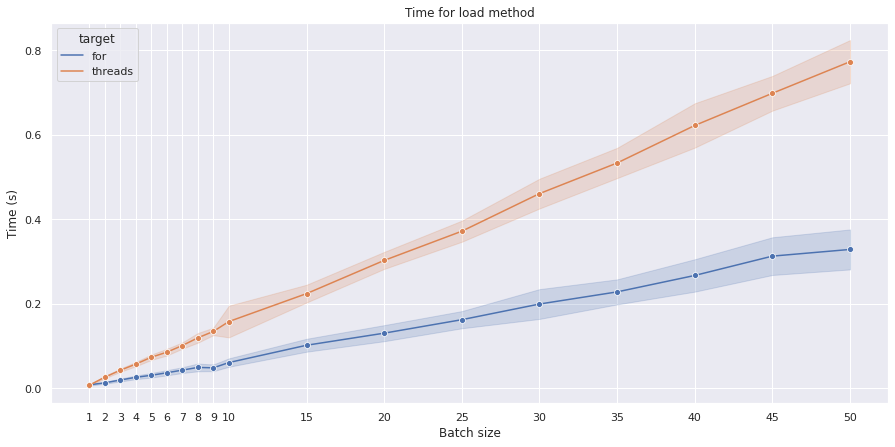

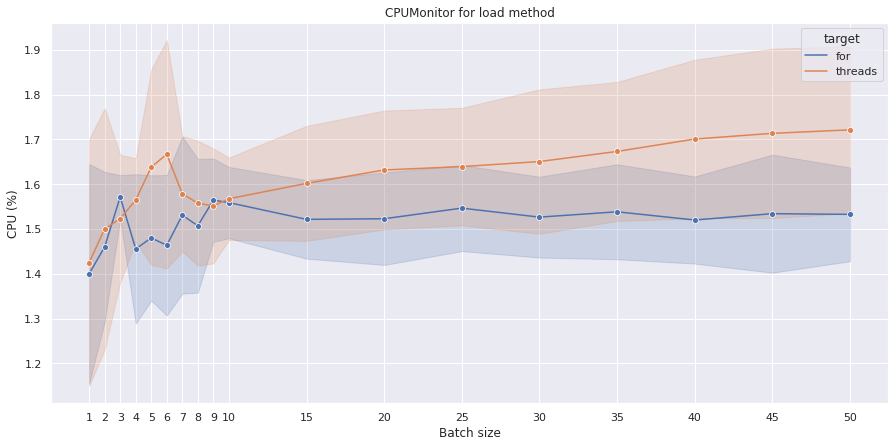

In [8]:
load_bm = Benchmark(method_name='load', method_kwargs={'src':'raw'},
                    root_pipeline=None, **default_kwargs)

load_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### load_combined_gather

0it [10:03:49, ?it/s] [00:00<00:21,  1.66it/s]
100%|██████████| 36/36 [02:25<00:00,  4.04s/it]


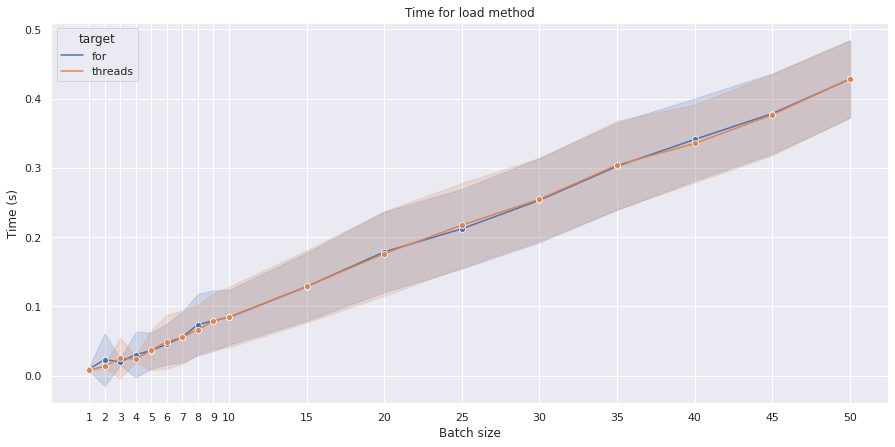

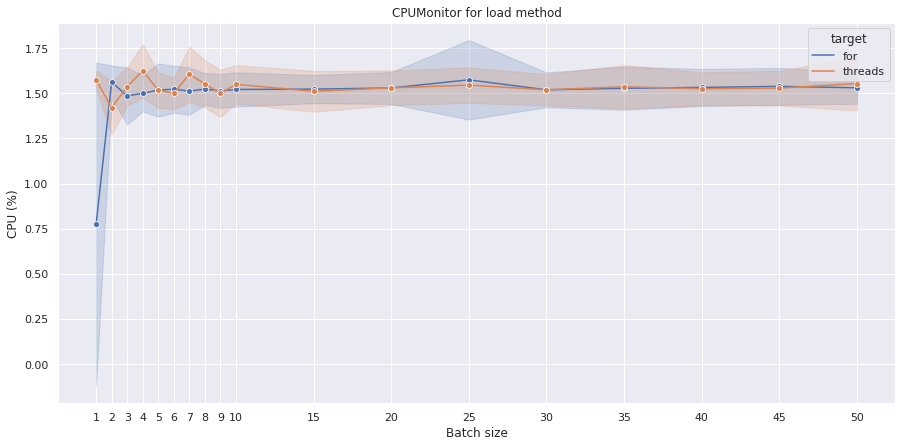

In [9]:
load_comb_bm = Benchmark(method_name='load', method_kwargs={'src':'raw', 'combined': True},
                         root_pipeline=None, **default_kwargs)

load_comb_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### copy

100%|██████████| 36/36 [04:01<00:00,  6.70s/it]


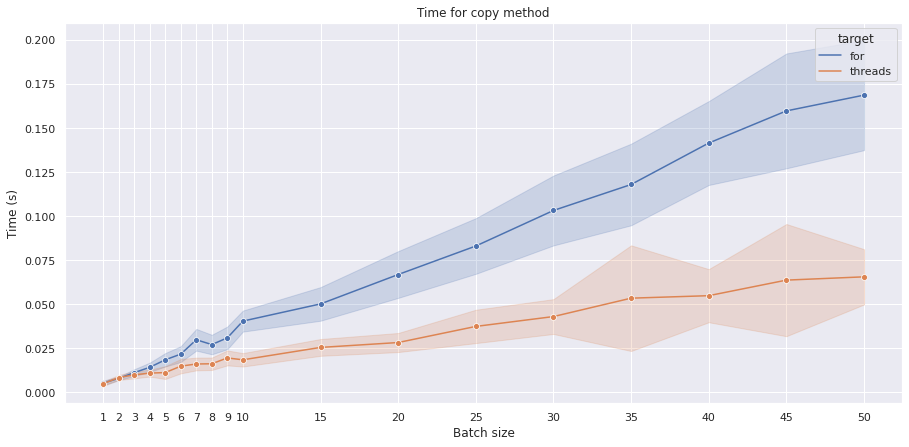

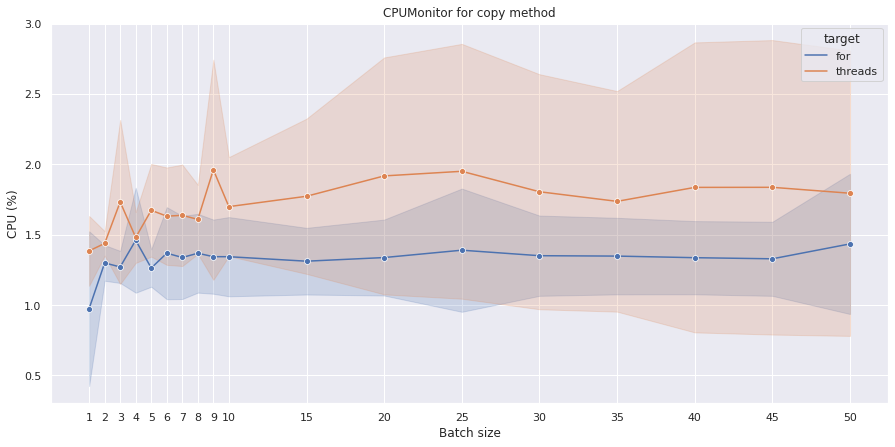

In [7]:
copy_bm = Benchmark(method_name='copy', method_kwargs={'src':'raw', 'dst':'rawraw'},
                    root_pipeline=load_pipeline, **default_kwargs)

copy_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### get_item

0it [10:19, ?it/s]6/36 [01:16<01:35,  4.76s/it]
100%|██████████| 36/36 [03:48<00:00,  6.34s/it]


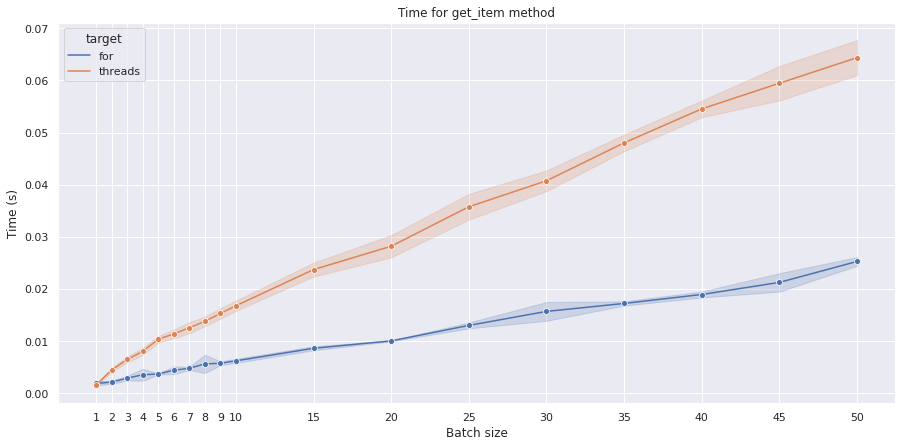

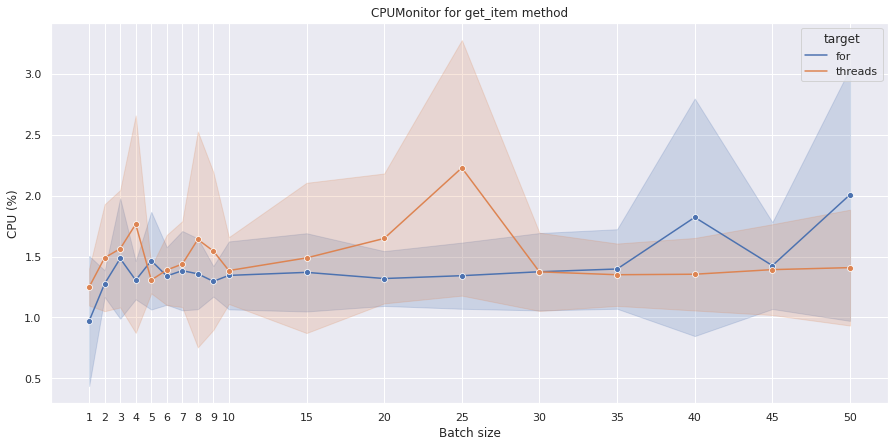

In [8]:
get_item_bm = Benchmark(method_name='get_item', method_args=([1, 2, 5], ), method_kwargs={'src':'raw'},
                    root_pipeline=load_pipeline, **default_kwargs)

get_item_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### dump

Research research_5e9fd6e00062c564319b2303f4b60ea7661be36b is starting...


Domain updated: 0: 100%|██████████| 36/36.0 [29:04<00:00, 48.47s/it]


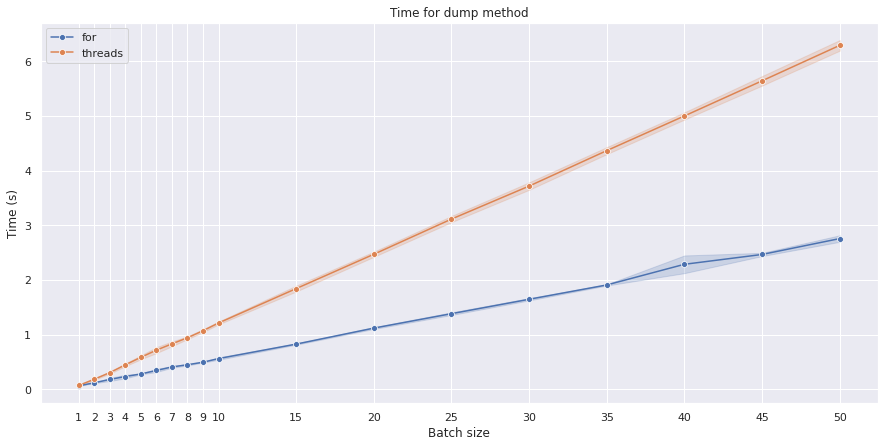

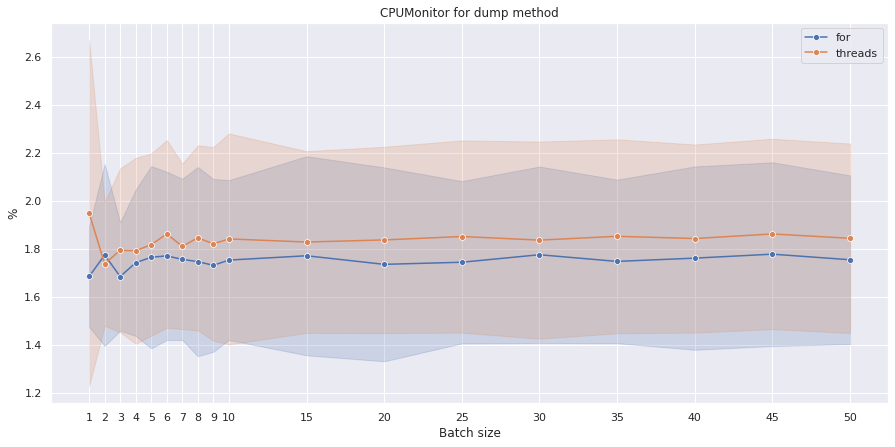

In [9]:
dump_bm = Benchmark(method_name='dump', method_kwargs={'src':'raw', 'path':'./dump1'},
                    root_pipeline=load_pipeline, **default_kwargs)

dump_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### sort

Research research_6a110f8f961546aab77549a8a973b7c1f65dd185 is starting...


Domain updated: 0: 100%|██████████| 36/36.0 [06:56<00:00, 11.56s/it]


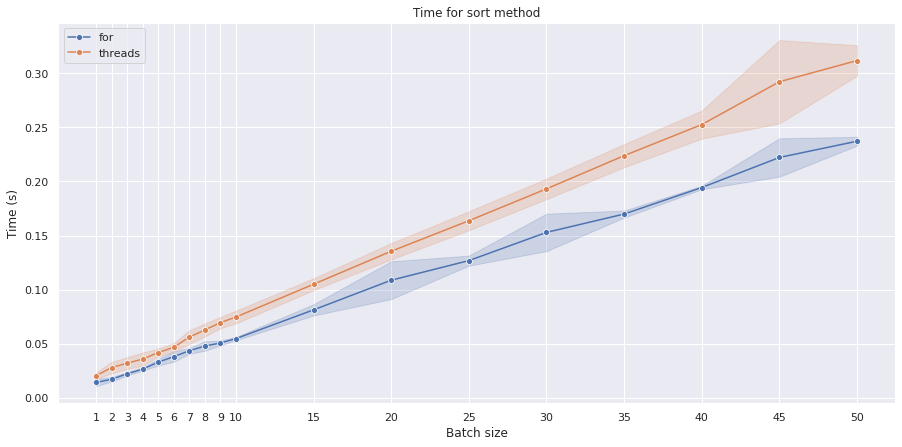

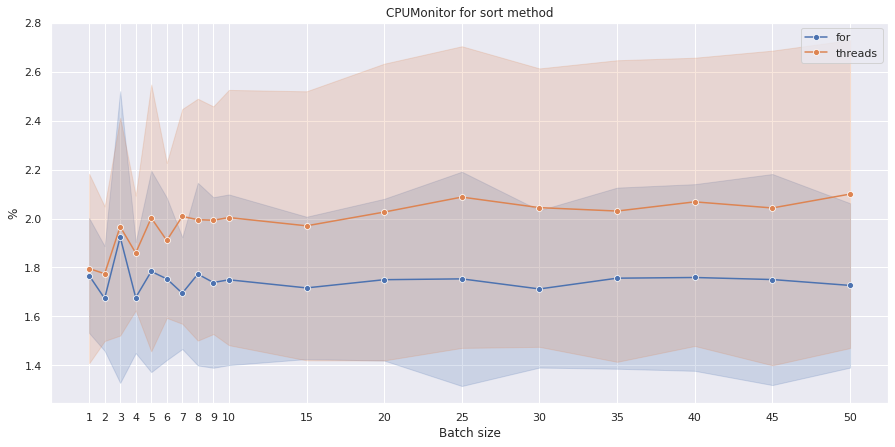

In [10]:
sort_bm = Benchmark(method_name='sort', method_kwargs={'src':'raw', 'by':'offset'},
                    root_pipeline=load_pipeline, **default_kwargs)

sort_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### pick_to_mask

100%|██████████| 36/36 [04:09<00:00,  6.92s/it]


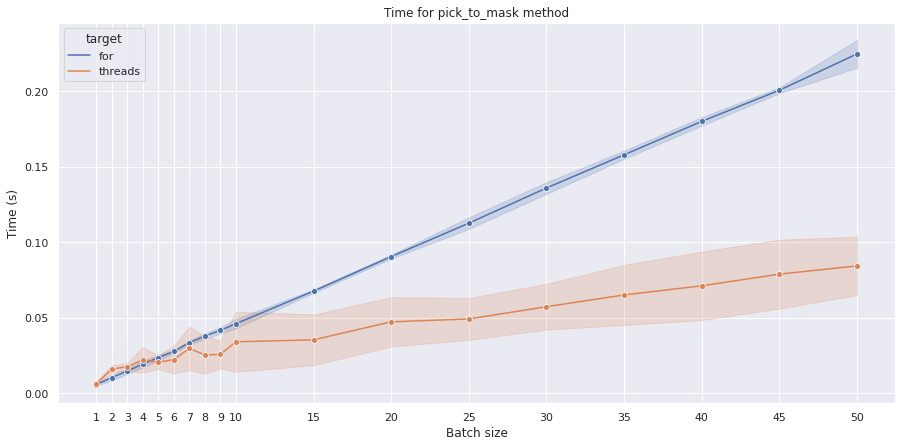

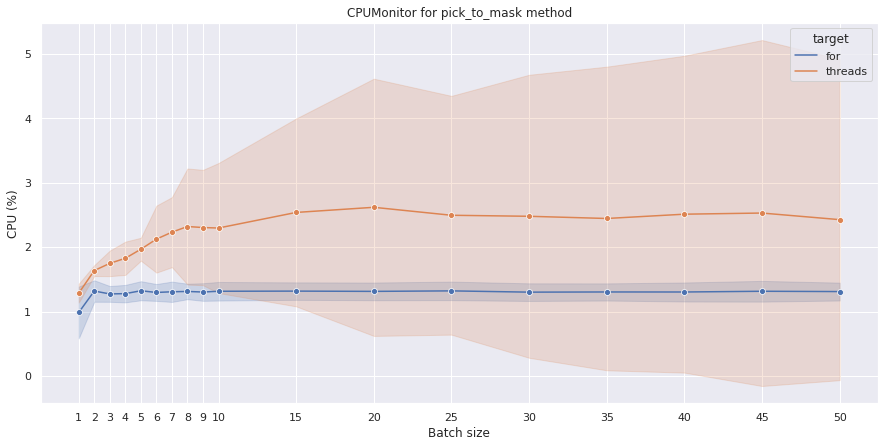

In [11]:
pcik_to_mask_bm = Benchmark(method_name='pick_to_mask', method_kwargs={'src':'raw'},
                            root_pipeline=load_pipeline, **default_kwargs)

pcik_to_mask_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### mask_to_pick

100%|██████████| 36/36 [05:00<00:00,  8.36s/it]


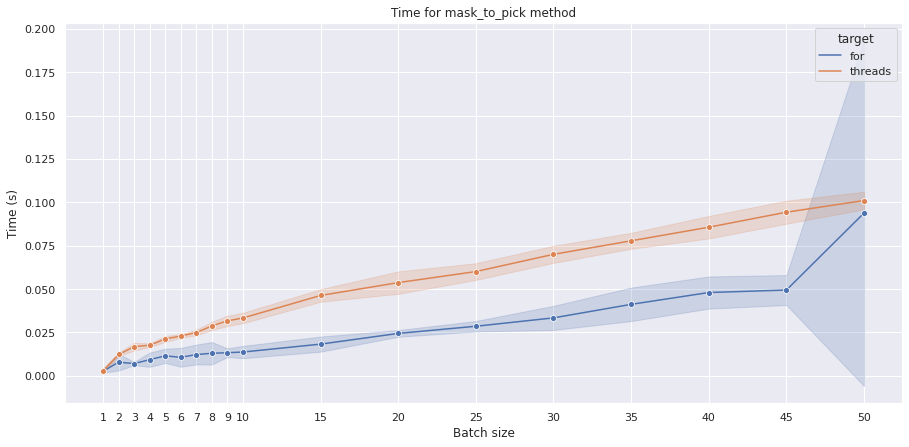

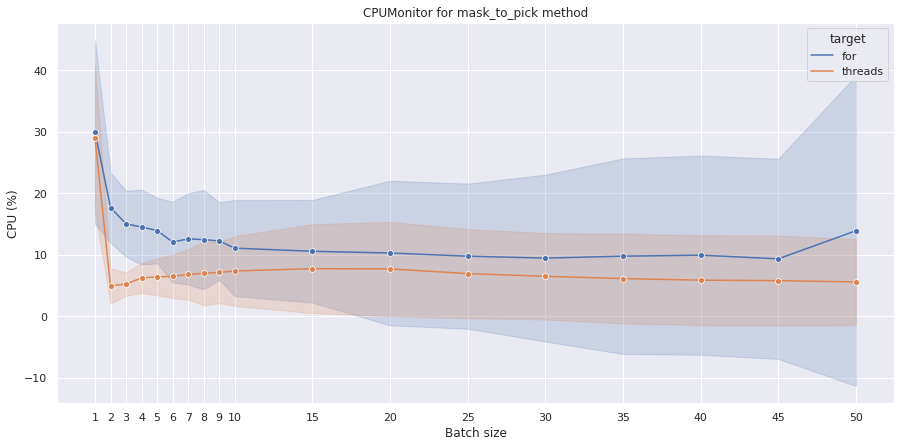

In [12]:
mask_to_pick_ppl = load_pipeline + Pipeline().pick_to_mask(src='raw')
mask_to_pick_bm = Benchmark(method_name='mask_to_pick', method_kwargs={'src':'raw', 'threshold':0.5},
                            root_pipeline=mask_to_pick_ppl, **default_kwargs)

mask_to_pick_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### mute

Research research_0f3fc1e7bc378a5854dc1bc700ed9cf5695a11a5 is starting...


Domain updated: 0: 100%|██████████| 36/36.0 [06:40<00:00, 11.13s/it]


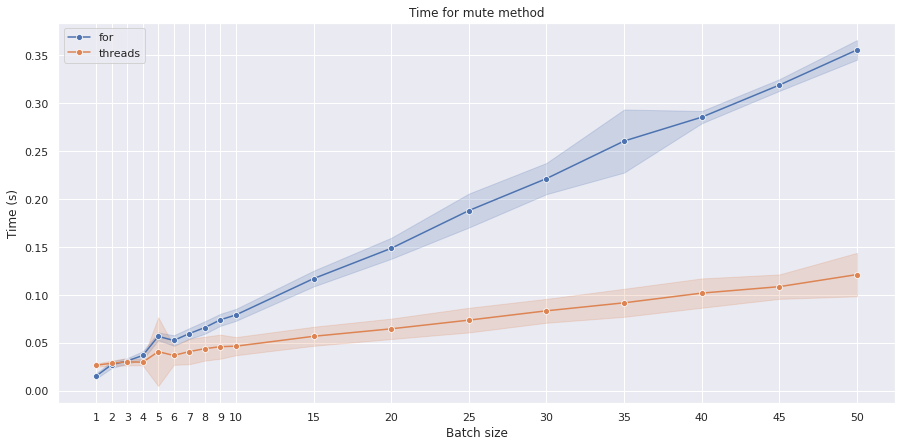

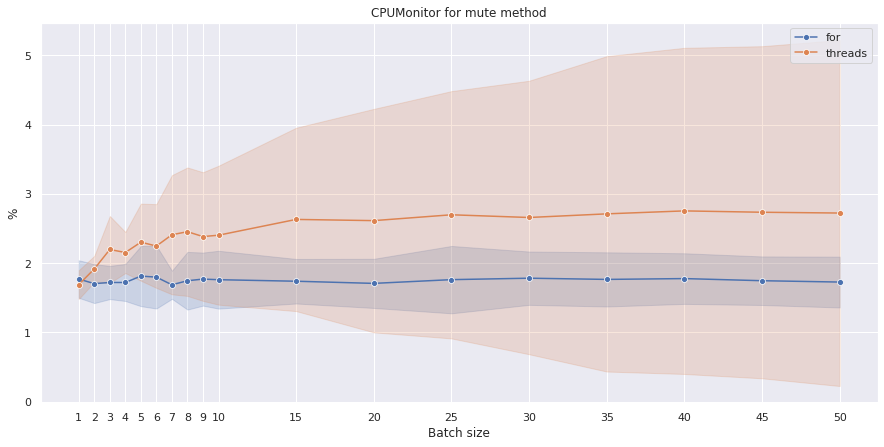

In [13]:
muter = Muter.from_points(offsets=[1000, 2000, 3000], times=[100, 300, 600])
mute_bm = Benchmark(method_name='mute', method_kwargs={'src': 'raw', 'muter': muter},
                    root_pipeline=load_pipeline, **default_kwargs)

mute_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### calculate_semblance

Research research_81548c1df33e030639dd35663d6918f1834cd9eb is starting...


Domain updated: 0: 100%|██████████| 36/36.0 [2:16:43<00:00, 227.87s/it]  


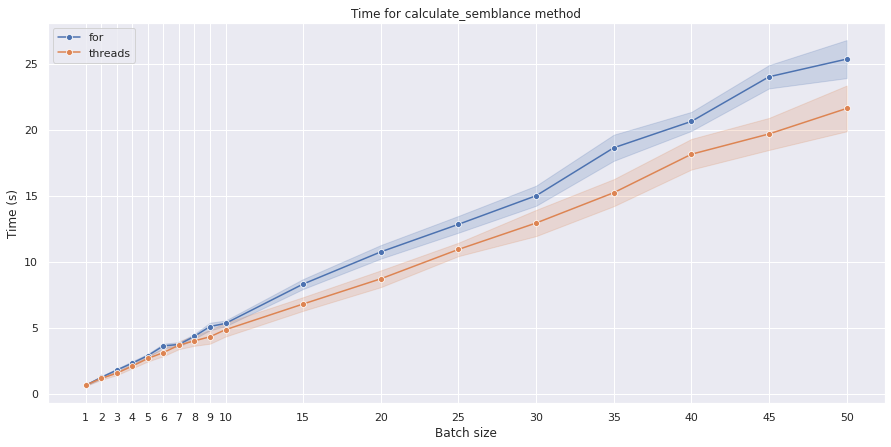

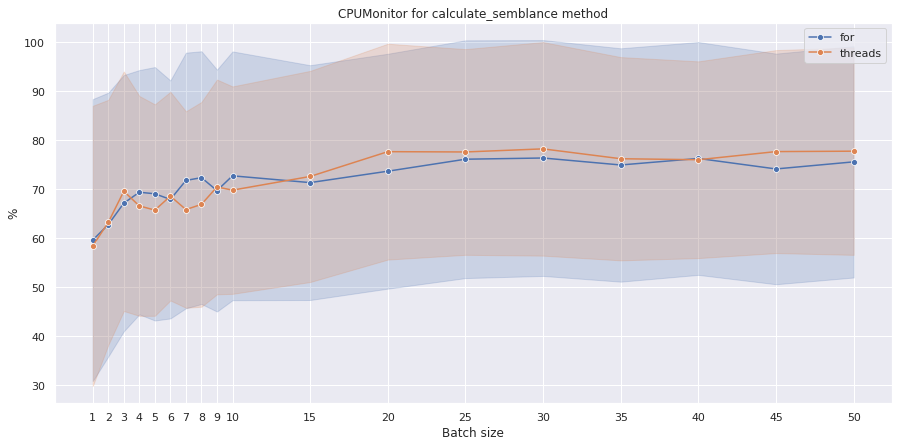

In [14]:
semblance_kwargs = {'src': 'raw', 'velocities': np.linspace(1300, 5500, 140), 'win_size': 25}
semblance_bm = Benchmark(method_name='calculate_semblance', method_kwargs=semblance_kwargs,
                         root_pipeline=sort_pipeline, **default_kwargs)

semblance_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### calculate_residual_semblance

Research research_81ce440fd4cf61eafc2508c14ca17b2abeed91d9 is starting...


Domain updated: 0: 100%|██████████| 28/28.0 [21:07<00:00, 45.25s/it]


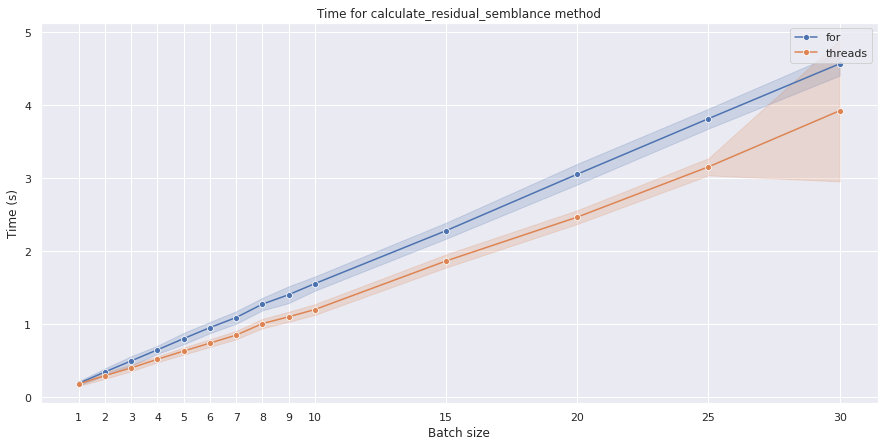

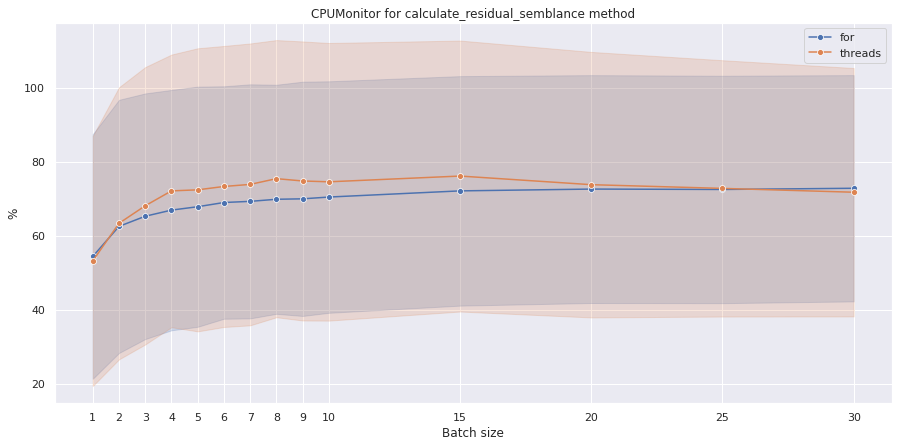

In [15]:
res_semblance_kwargs = {
    'src': 'raw', 
    'stacking_velocity': stacking_velocity,
    'n_velocities': 140, 
    'win_size': 25
}
res_semblance_bm = Benchmark(method_name='calculate_residual_semblance', method_kwargs=res_semblance_kwargs,
                             root_pipeline=sort_pipeline, targets=TARGETS, batch_sizes=BATCH_SIZES[:-4], 
                             dataset=dataset)

res_semblance_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### get_central_cdp

Research research_c3f1fcbf8b124239692ed212627a64463a6bd077 is starting...


Domain updated: 0: 100%|██████████| 36/36.0 [07:27<00:00, 12.44s/it]


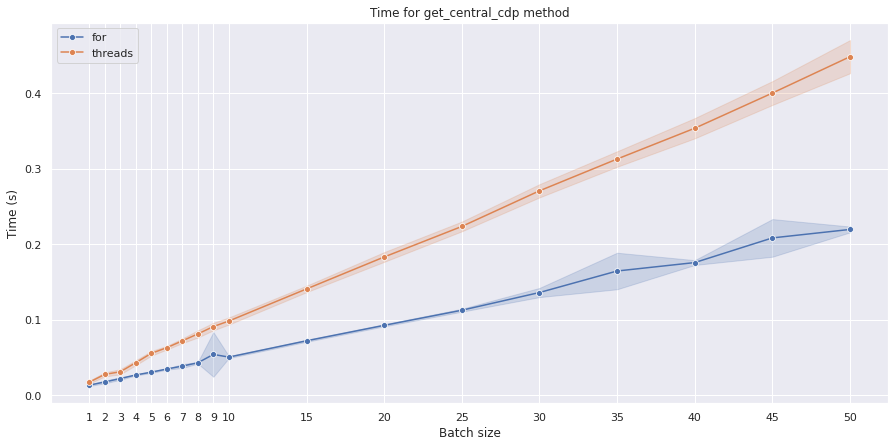

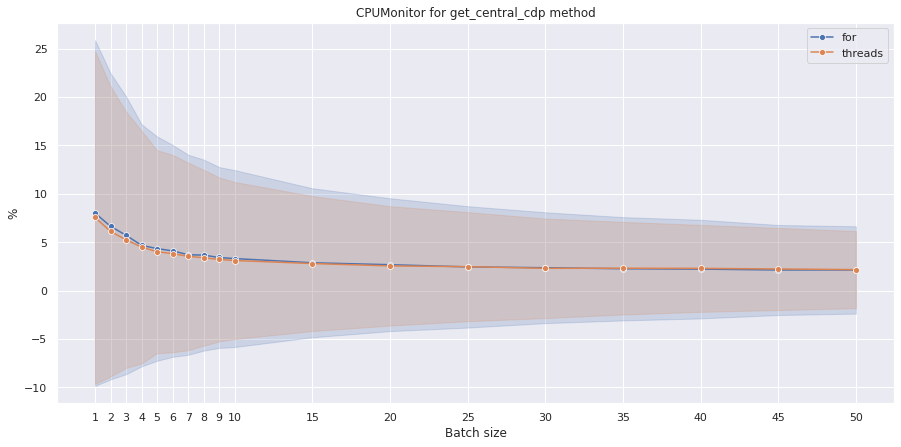

In [16]:
get_central_cdp_bm = Benchmark(method_name='get_central_cdp', method_kwargs={'src':'raw'},
                               root_pipeline=load_pipeline, **cdp_kwargs)

get_central_cdp_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### apply_nmo

Research research_ba0f949c516f40b5e7e1441ac4da7cd7444ca0b7 is starting...


Domain updated: 0: 100%|██████████| 36/36.0 [10:14<00:00, 17.06s/it]


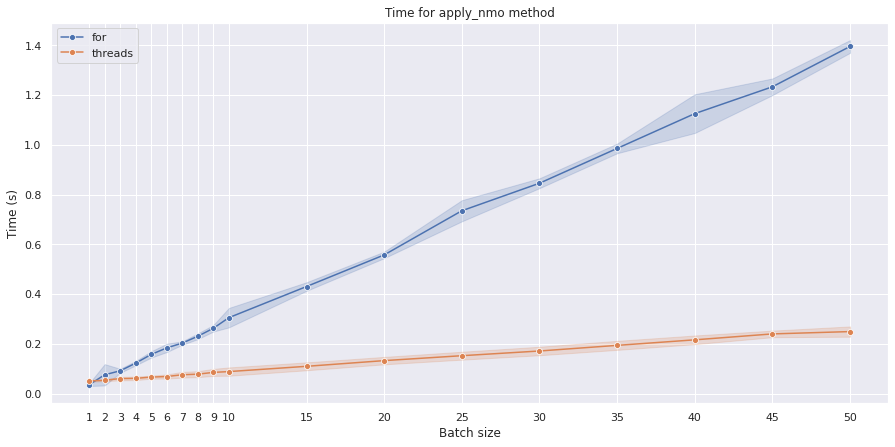

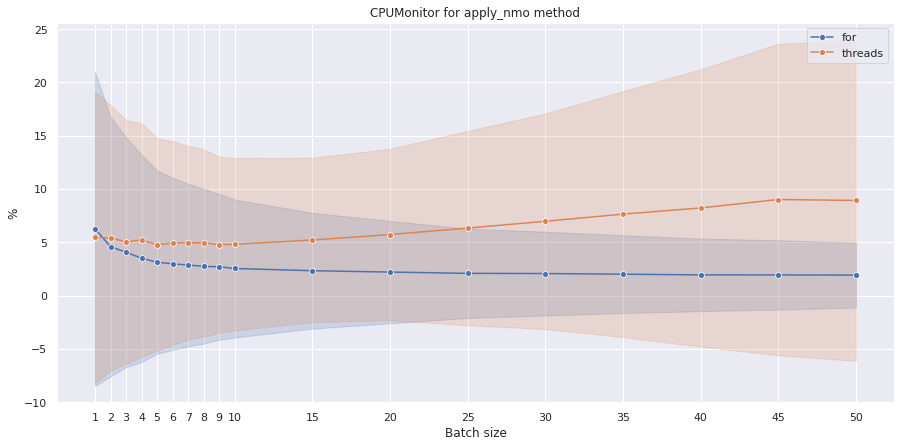

In [17]:
apply_nmo_bm = Benchmark(method_name='apply_nmo', method_kwargs={'src': 'raw', 'stacking_velocity':stacking_velocity},
                         root_pipeline=load_pipeline, **default_kwargs)
apply_nmo_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### stack

Research research_c66018d426a355f4061d0eb01f81e5d7abc5ffe3 is starting...


Domain updated: 0: 100%|██████████| 36/36.0 [09:46<00:00, 16.29s/it]


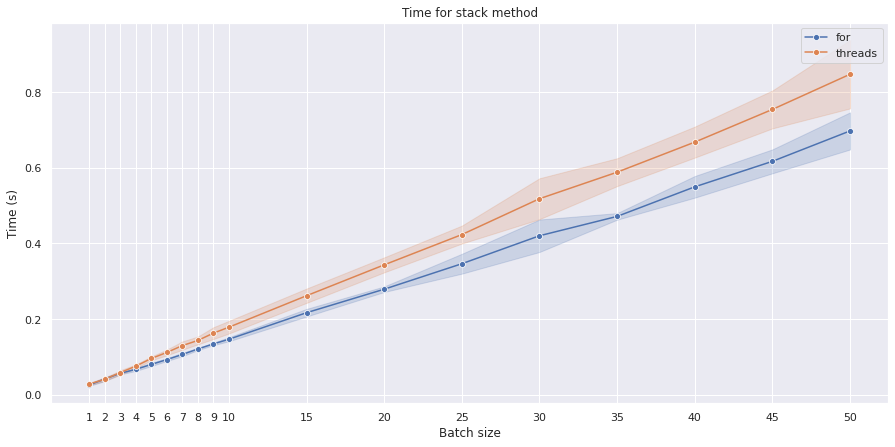

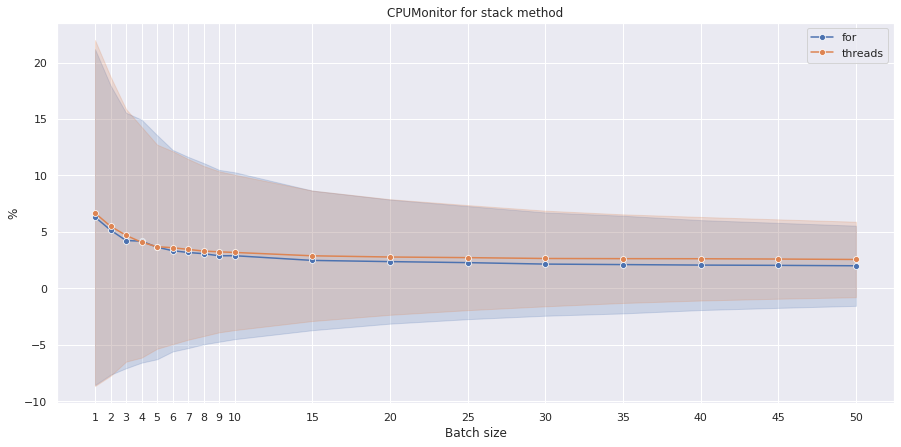

In [18]:
apply_nmo_bm = Benchmark(method_name='stack', method_kwargs={'src': 'raw'},
                         root_pipeline=load_pipeline, **default_kwargs)
apply_nmo_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### scale_standard


Research research_dfc45f53e3cfe87339619f091459d966b2fe0441 is starting...


Domain updated: 0: 100%|██████████| 36/36.0 [08:00<00:00, 13.35s/it]


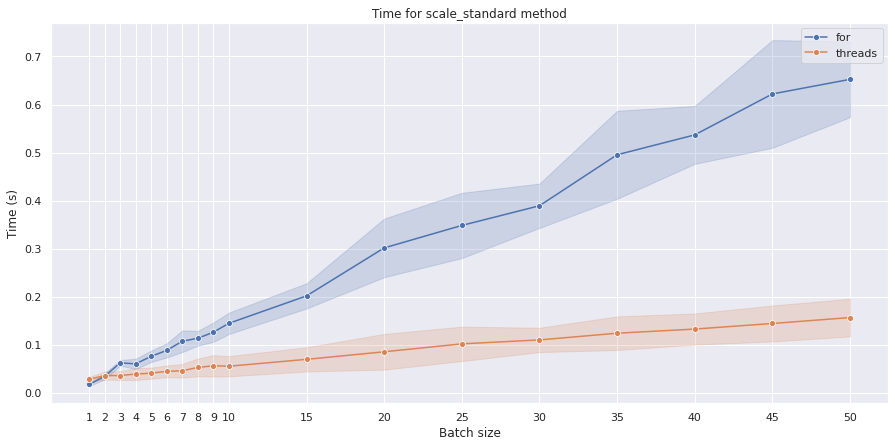

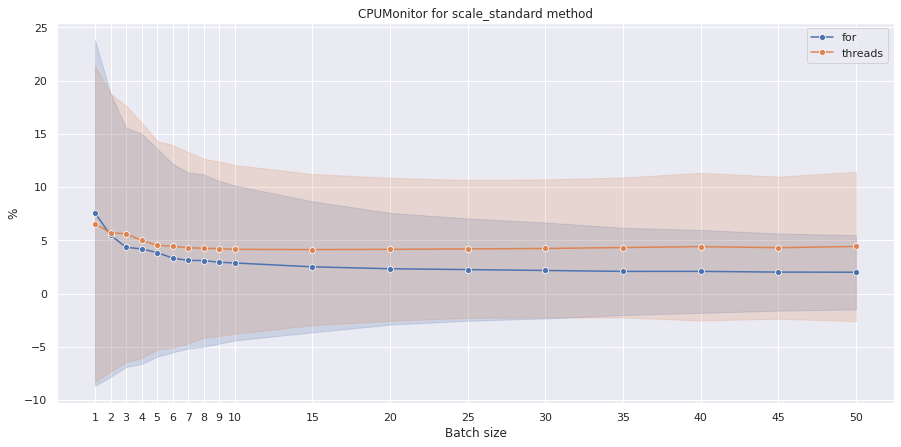

In [19]:
scale_std_bm = Benchmark(method_name='scale_standard', method_kwargs={'src':'raw'},
                         root_pipeline=load_pipeline, **default_kwargs)

scale_std_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### scale_maxabs

Research research_120ed033dca3c0cdec35c232b3974d1eb01811b5 is starting...


Domain updated: 0: 100%|██████████| 36/36.0 [07:37<00:00, 12.71s/it]


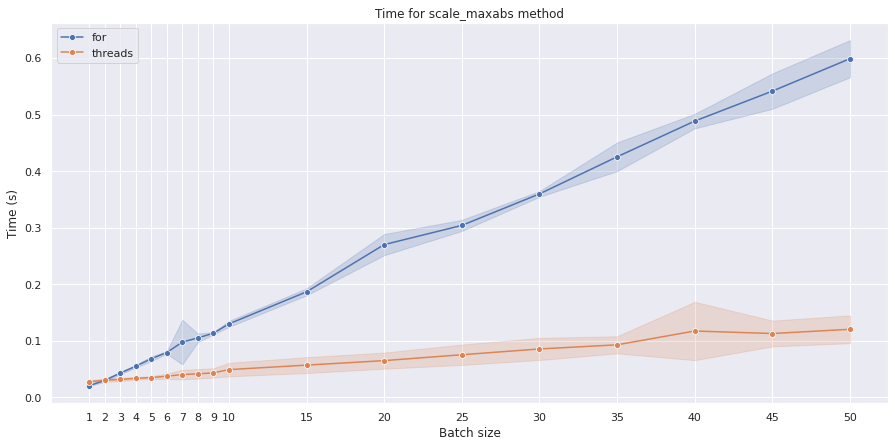

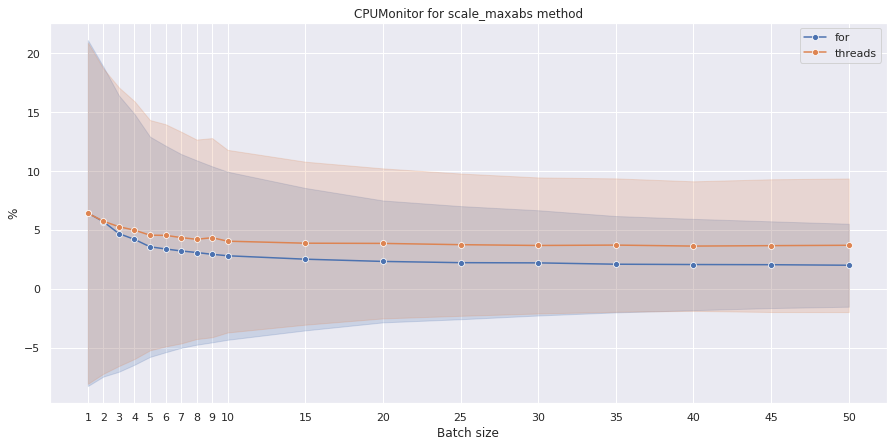

In [20]:
scale_maxabs_bm = Benchmark(method_name='scale_maxabs', method_kwargs={'src':'raw'},
                            root_pipeline=load_pipeline, **default_kwargs)

scale_maxabs_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### scale_minmax

Research research_fef108901ef386ff55fe9dcef0c2e7a0e6676604 is starting...


Domain updated: 0: 100%|██████████| 36/36.0 [08:18<00:00, 13.84s/it]


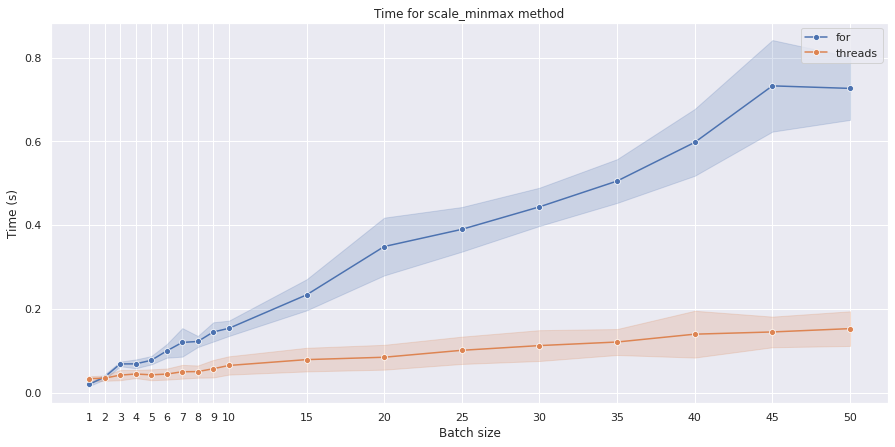

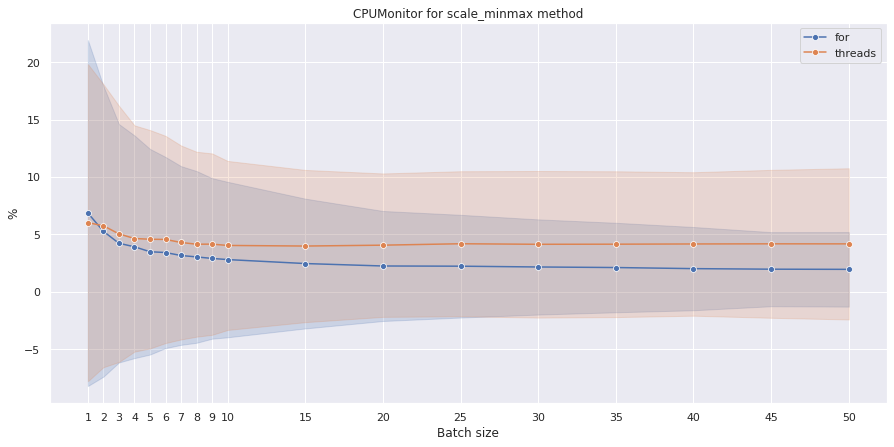

In [21]:
scale_minmax_bm = Benchmark(method_name='scale_minmax', method_kwargs={'src':'raw'},
                            root_pipeline=load_pipeline, **default_kwargs)

scale_minmax_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### crop

100%|██████████| 36/36 [03:56<00:00,  6.56s/it]


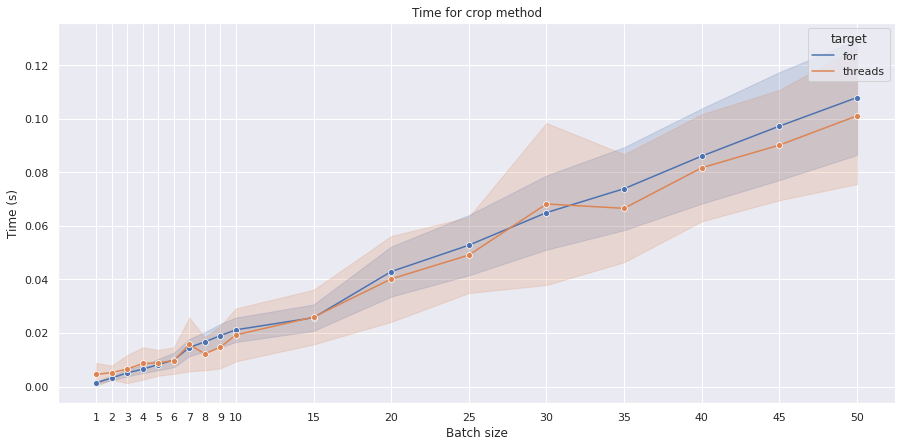

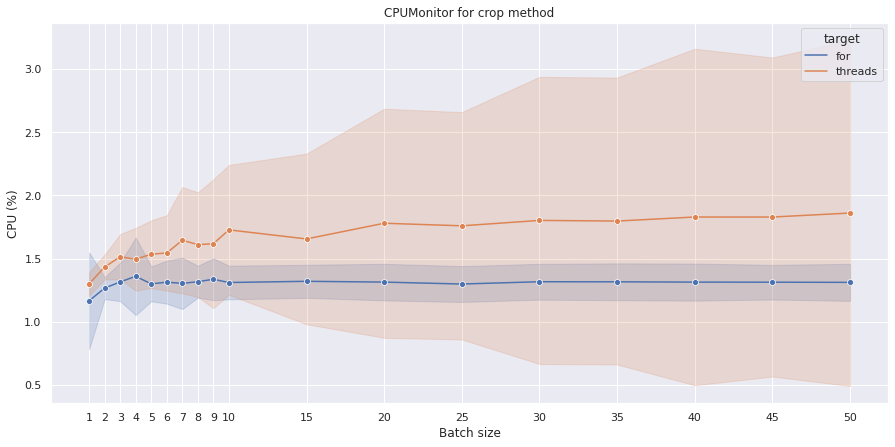

In [22]:
method_kwargs = {'src': 'raw', 'crop_shape': (200, 500), 'origins': 'random', 'n_crops': 16}

crop_bm = Benchmark(method_name='crop', method_kwargs=method_kwargs, root_pipeline=load_pipeline, **default_kwargs)

crop_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### calculate_stacking_velocity

Research research_6a6d63690b9e2dfd4e6727b3907b725f78e71e19 is starting...


Domain updated: 0: 100%|██████████| 36/36.0 [2:21:15<00:00, 235.43s/it]  


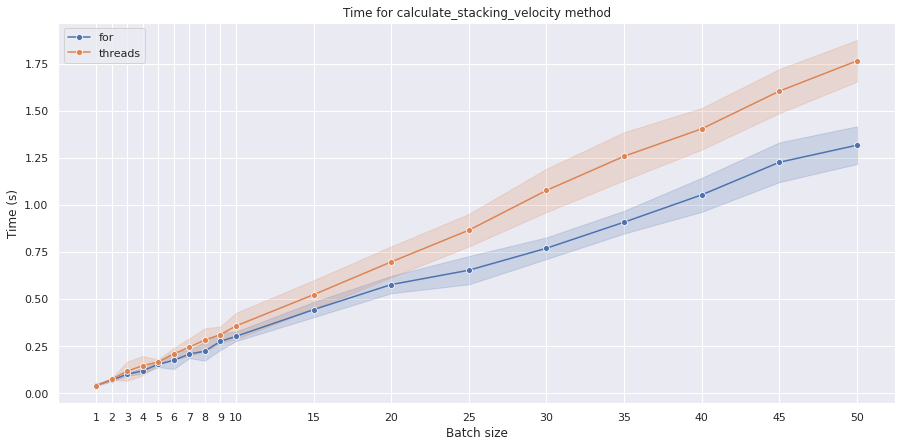

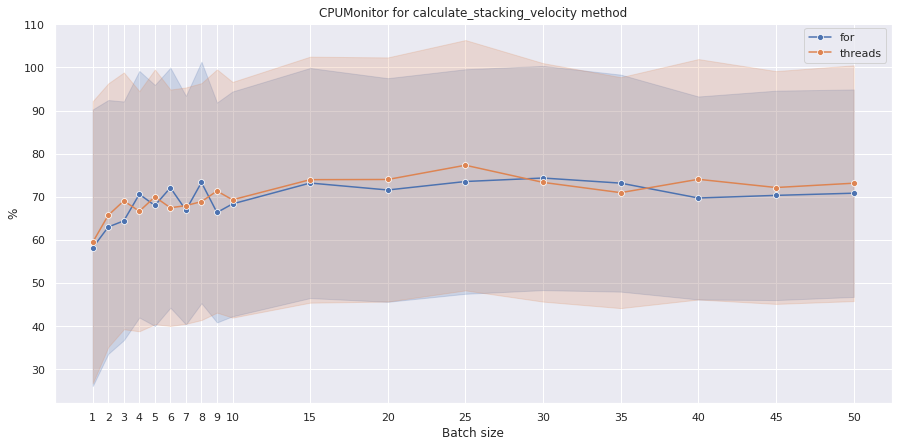

In [23]:
stacking_velocity_pipeline = sort_pipeline + Pipeline().calculate_semblance(src="raw", velocities=np.linspace(1400, 5000, 150), dst="semb")
method_kwargs = {'src': 'semb', 'start_velocity_range': (1400, 1800), 'end_velocity_range': (3500, 5000)}

stacking_velocity_bm = Benchmark(method_name='calculate_stacking_velocity', method_kwargs=method_kwargs,
                                 root_pipeline=stacking_velocity_pipeline, **default_kwargs)

stacking_velocity_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### assemble_gather

100%|██████████| 36/36 [06:19<00:00, 10.54s/it]


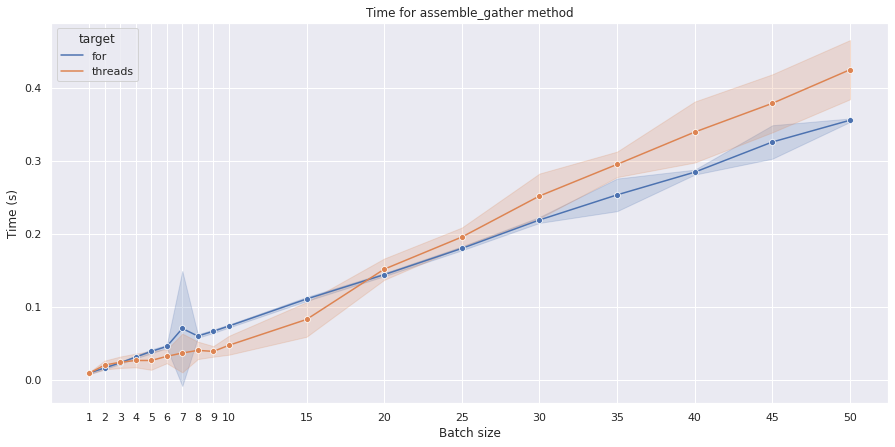

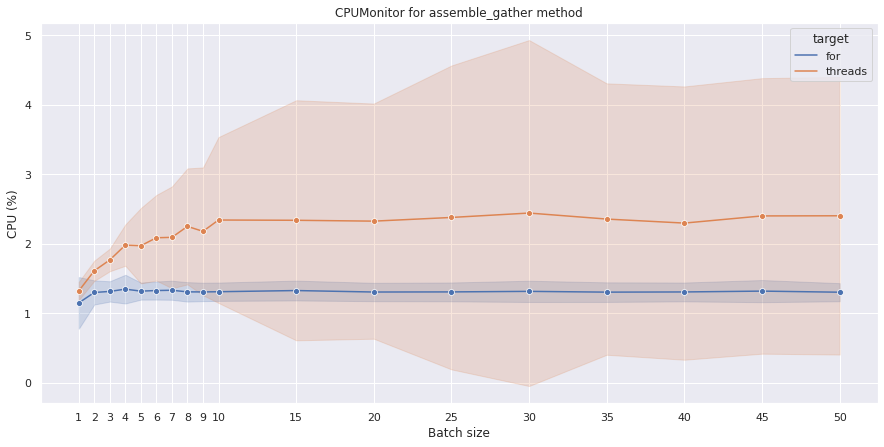

In [24]:
crop_grid_pipeline = load_pipeline + Pipeline().crop(src='raw', dst='cropped', origins='grid', crop_shape=(200, 500))

assemble_bm = Benchmark(method_name='assemble_gather', method_kwargs={'src': 'cropped'}, 
                        root_pipeline=crop_grid_pipeline, **default_kwargs)

assemble_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

### apply_agc

100%|██████████| 36/36 [06:36<00:00, 11.01s/it]


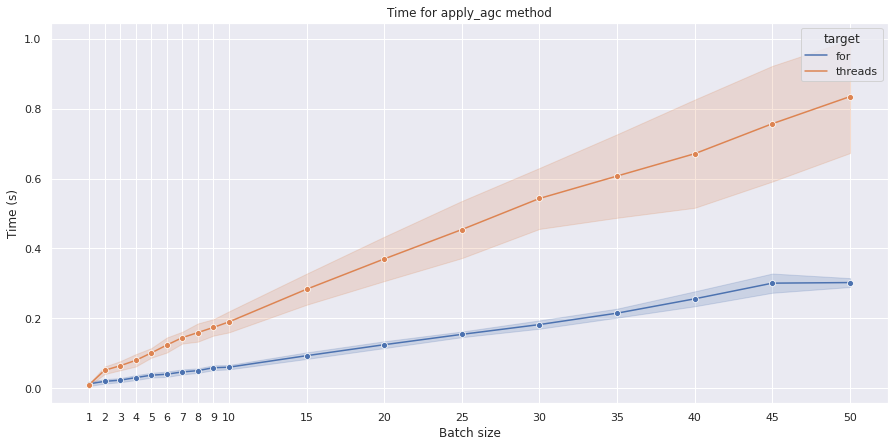

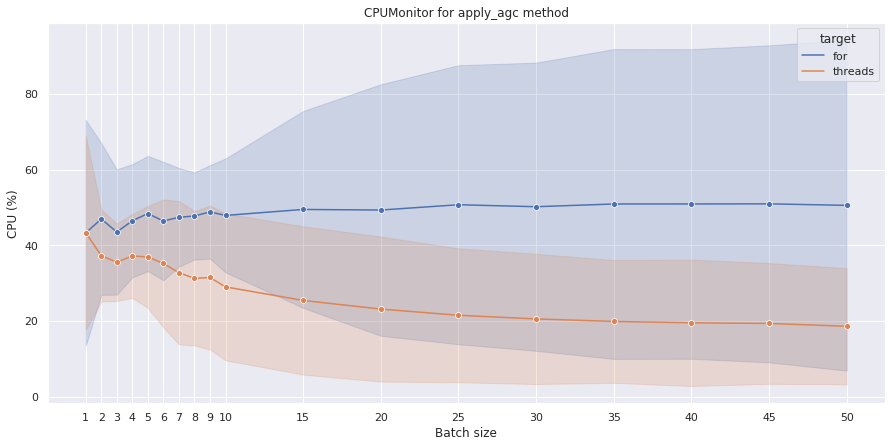

In [12]:
agc_bm = Benchmark(method_name='apply_agc', method_kwargs={'src': 'raw', 'mode':'abs'}, 
                   root_pipeline=load_pipeline, **default_kwargs)

agc_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)

#### correct_sdc

In [ ]:
sdc_bm = Benchmark(method_name='correct_spherical_divergence', method_kwargs={'src': 'raw', ...}, 
                   root_pipeline=load_pipeline, **default_kwargs)

sdc_bm.run(n_iters=N_ITERS, shuffle=SHUFFLE).plot(cpu_util=True)